In [72]:
import matplotlib
import matplotlib.pyplot as plt
import obspy
import numpy as np
import pyasdf
from obspy.geodetics import locations2degrees,gps2dist_azimuth
%matplotlib inline

In [3]:
selected_stations=["ASI","ONS","TYM","KZS","HJO","AOG","SBT","ADM","KZK","WJM","SRN","SGN","FUJ","TTO","KNM","JIZ","KNY","NAA","WTR","KIS","TGA","YAS","ABU","NOK","KMT"]

In [6]:
from obspy.taup import TauPyModel
model = TauPyModel(model="ak135")

In [7]:
stations=np.loadtxt("/Users/ziyixi/packages/seisflow/data/STATIONS",dtype=np.str)
mapper={}
for row in stations:
    net_sta=f"{row[1]}.{row[0]}"
    mapper[net_sta]=(float(row[2]),float(row[3]))

In [116]:
def plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,left,right,scale):
    data_asdf=pyasdf.ASDFDataSet(data_asdf_path,mode="r")
    sync_asdf=pyasdf.ASDFDataSet(sync_asdf_path,mode="r")
    evla=data_asdf.events[0].origins[0].latitude
    evlo=data_asdf.events[0].origins[0].longitude
    evdp=data_asdf.events[0].origins[0].depth
    print(evdp)
    evtime=data_asdf.events[0].origins[0].time
    
    plt.figure(figsize=(4,15))
    for each_station in stations:
        net_sta=f"BO.{each_station}"
        try:
            data_wg=data_asdf.waveforms[net_sta]
            data_tag=data_wg.get_waveform_tags()[0]
            sync_wg=sync_asdf.waveforms[net_sta]
            sync_tag=sync_wg.get_waveform_tags()[0]
            data_st=data_wg[data_tag].select(component=component)[0]
            sync_st=sync_wg[sync_tag].select(component=component)[0]
        except:
            continue
        
        # calculate the travel time
        stla=mapper[net_sta][0]
        stlo=mapper[net_sta][1]
        gcarc=locations2degrees(evla, evlo, stla, stlo)
        _,az,baz=gps2dist_azimuth(evla, evlo, stla, stlo)
        arrivals = model.get_travel_times(source_depth_in_km=evdp,
                                  distance_in_degree=gcarc,phase_list=[phase])
        if(len(arrivals)==0):
            continue
        
        thearrival=arrivals[0].time
        lefttime=evtime+thearrival+left
        righttime=evtime+thearrival+right
        
        data_toplot=data_st.slice(lefttime,righttime)
        data_toplot.normalize()
        sync_toplot=sync_st.slice(lefttime,righttime)
        sync_toplot.normalize()
        data_x=np.linspace(left,right,data_toplot.stats.npts)
        sync_x=np.linspace(left,right,sync_toplot.stats.npts)
        data_y=data_toplot.data*scale+gcarc
        sync_y=sync_toplot.data*scale+gcarc
        plt.plot(data_x,data_y,color="k")
        plt.plot(sync_x,sync_y,color="r")
        ax=plt.gca()
        ax.tick_params(axis='both', which='major', labelsize=13)
        plt.xlabel("time(s)",fontsize=20)
        plt.ylabel("gcarc(degree)",fontsize=20)
        x_text_pos=(right-left)*1.1+left
        plt.text(x_text_pos,gcarc,f"{net_sta},{az:.2f}")
#         plt.xticks(range(left,right,),range(left,right,50))

## 200806292053A
### ST

324.947998046875


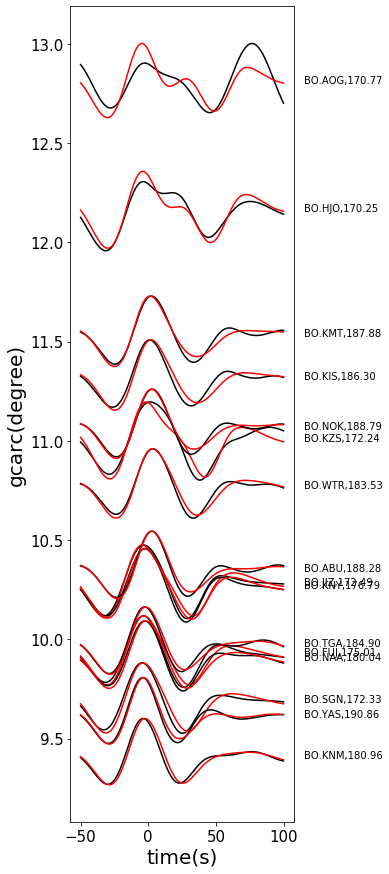

In [78]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

324.947998046875


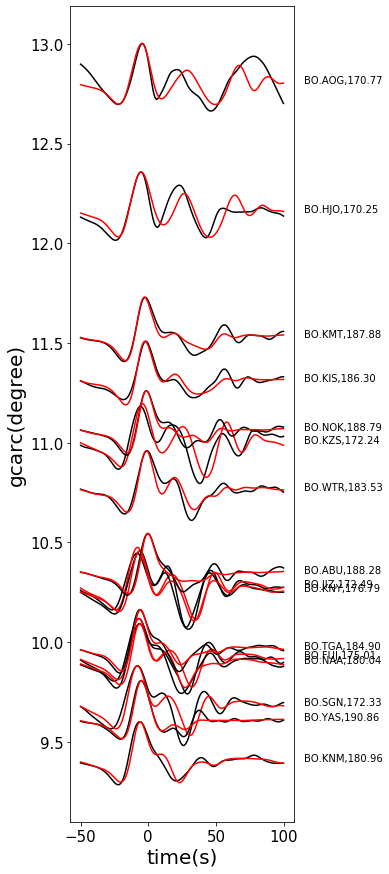

In [79]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

324.947998046875


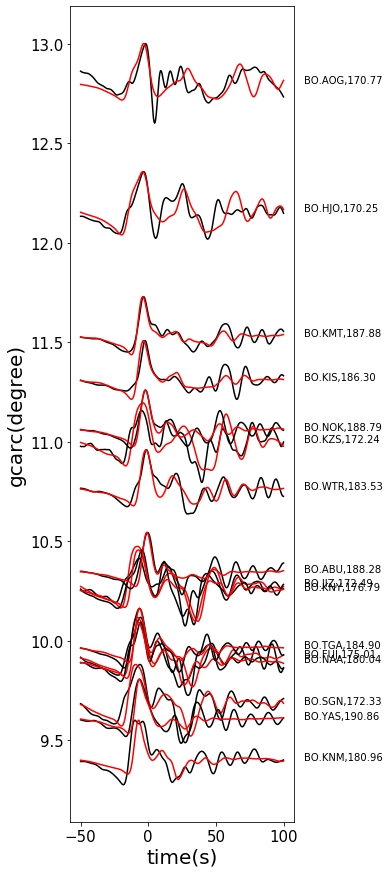

In [80]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

324.947998046875


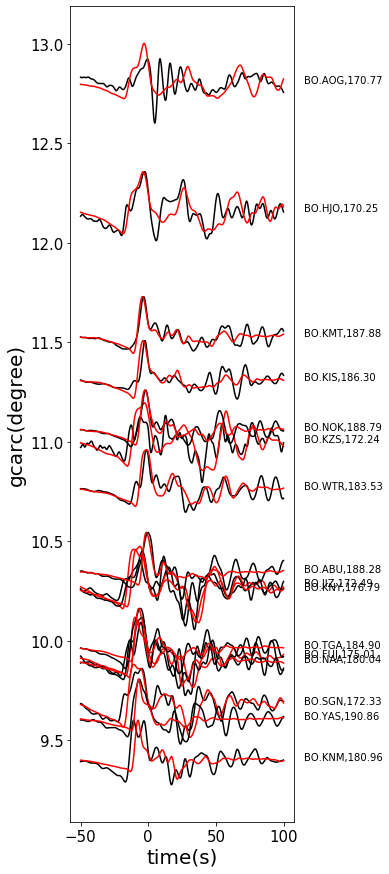

In [81]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

### SZ

324.947998046875


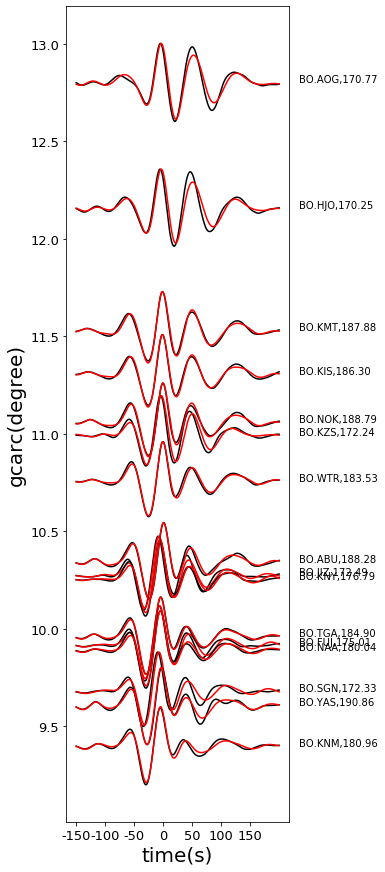

In [94]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="S"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-150,200,0.2)

324.947998046875


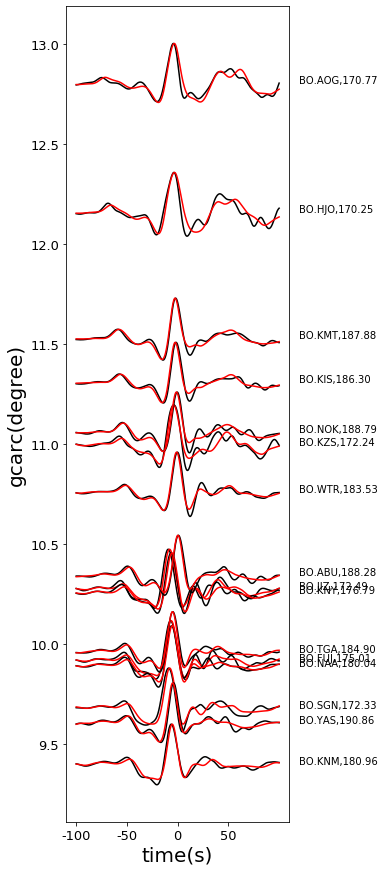

In [96]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="S"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-100,100,0.2)

324.947998046875


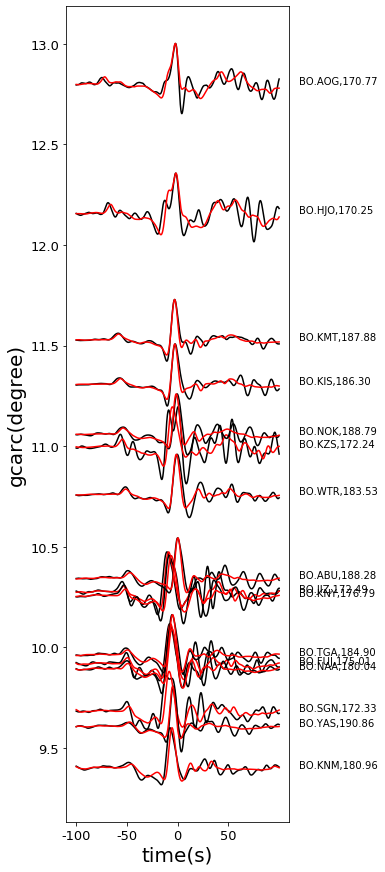

In [97]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="S"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-100,100,0.2)

324.947998046875


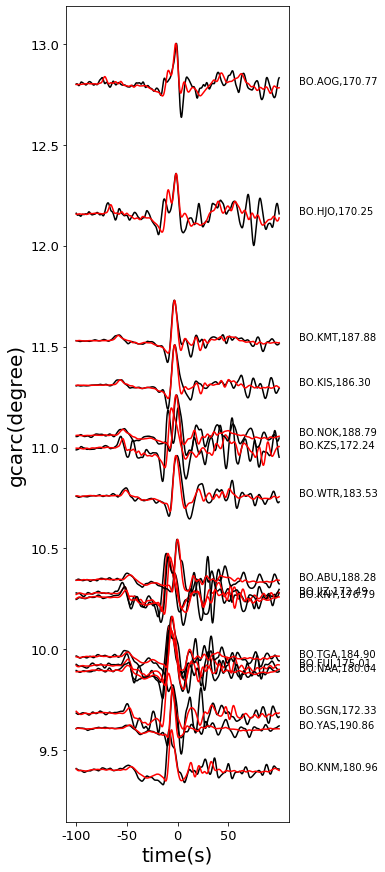

In [98]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="S"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-100,100,0.2)

324.947998046875


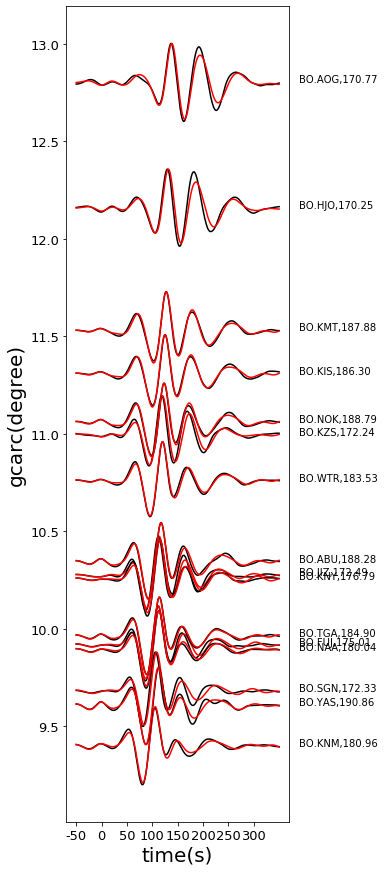

In [110]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,350,0.2)

324.947998046875


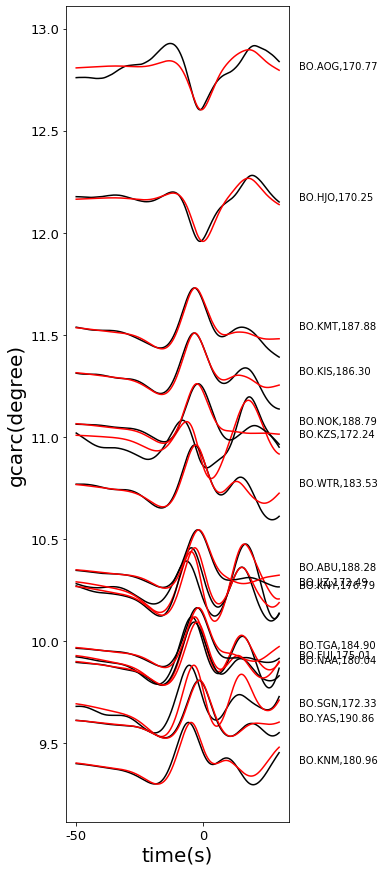

In [111]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-50,30,0.2)

324.947998046875


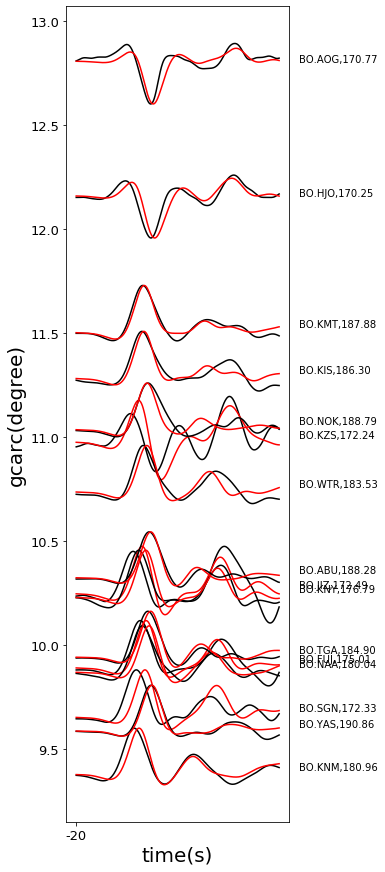

In [113]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-20,30,0.2)

324.947998046875


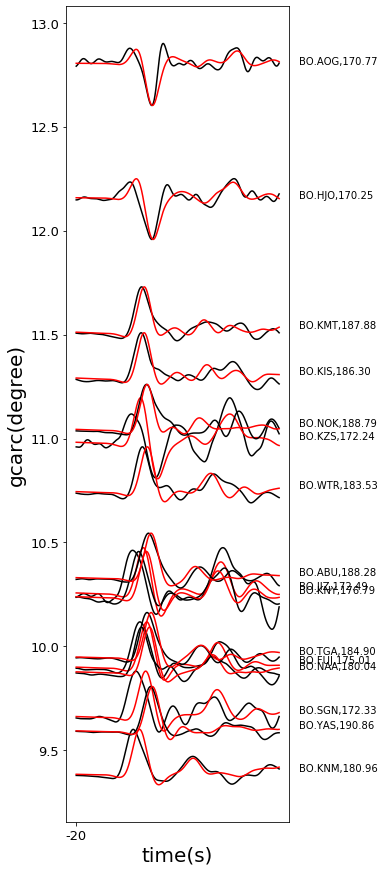

In [114]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-20,30,0.2)

324.947998046875


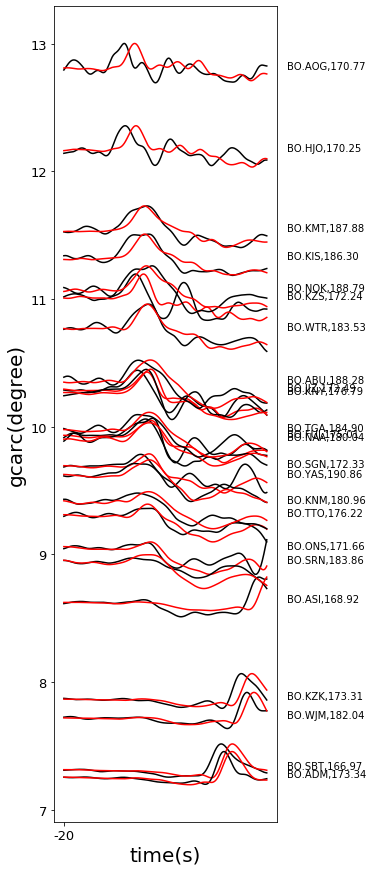

In [115]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_200806292053A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/200806292053A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="sP"
component="Z"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component,-20,30,0.2)

## 201003300102A

8.286800384521484


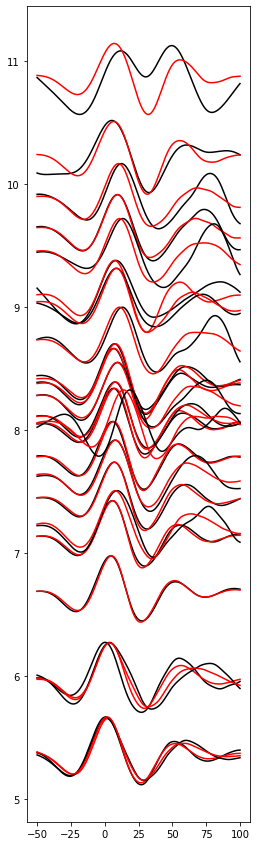

In [44]:
# /Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201003300102A.preprocessed_6s_to_100s.h5
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201003300102A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201003300102A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component)

8.286800384521484


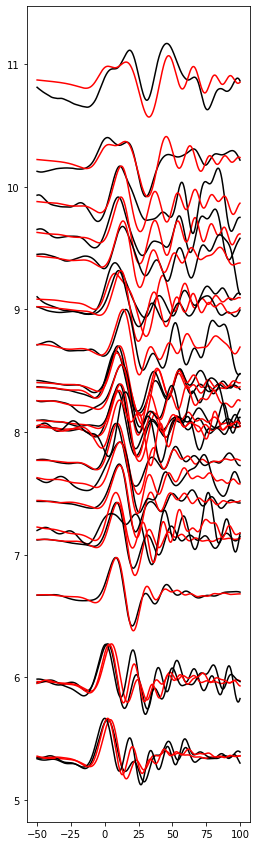

In [45]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201003300102A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201003300102A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component)

8.286800384521484


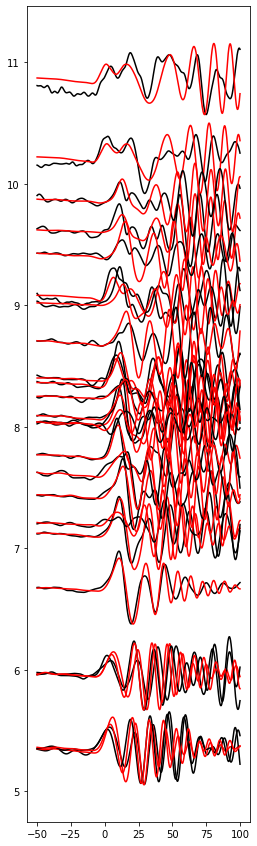

In [46]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201003300102A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201003300102A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component)

8.286800384521484


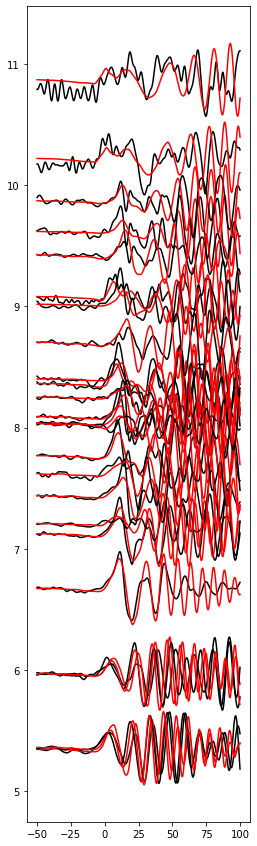

In [47]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201003300102A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201003300102A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure(data_asdf_path,sync_asdf_path,stations,phase,component)

In [121]:
def plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,left,right,scale):
    data_asdf=pyasdf.ASDFDataSet(data_asdf_path,mode="r")
    sync_asdf=pyasdf.ASDFDataSet(sync_asdf_path,mode="r")
    evla=data_asdf.events[0].origins[0].latitude
    evlo=data_asdf.events[0].origins[0].longitude
    evdp=data_asdf.events[0].origins[0].depth/1000
    print(evdp)
    evtime=data_asdf.events[0].origins[0].time
    
    plt.figure(figsize=(4,15))
    for each_station in stations:
        net_sta=f"BO.{each_station}"
        try:
            data_wg=data_asdf.waveforms[net_sta]
            data_tag=data_wg.get_waveform_tags()[0]
            sync_wg=sync_asdf.waveforms[net_sta]
            sync_tag=sync_wg.get_waveform_tags()[0]
            data_st=data_wg[data_tag].select(component=component)[0]
            sync_st=sync_wg[sync_tag].select(component=component)[0]
        except:
            continue
        
        # calculate the travel time
        stla=mapper[net_sta][0]
        stlo=mapper[net_sta][1]
        gcarc=locations2degrees(evla, evlo, stla, stlo)
        _,az,baz=gps2dist_azimuth(evla, evlo, stla, stlo)
        arrivals = model.get_travel_times(source_depth_in_km=evdp,
                                  distance_in_degree=gcarc,phase_list=[phase])
        if(len(arrivals)==0):
            continue
        
        thearrival=arrivals[0].time
        lefttime=evtime+thearrival+left
        righttime=evtime+thearrival+right
        
        data_toplot=data_st.slice(lefttime,righttime)
        data_toplot.normalize()
        sync_toplot=sync_st.slice(lefttime,righttime)
        sync_toplot.normalize()
        data_x=np.linspace(left,right,data_toplot.stats.npts)
        sync_x=np.linspace(left,right,sync_toplot.stats.npts)
        data_y=data_toplot.data*scale+gcarc
        sync_y=sync_toplot.data*scale+gcarc
        plt.plot(data_x,data_y,color="k")
        plt.plot(sync_x,sync_y,color="r")
        ax=plt.gca()
        ax.tick_params(axis='both', which='major', labelsize=13)
        plt.xlabel("time(s)",fontsize=20)
        plt.ylabel("gcarc(degree)",fontsize=20)
        x_text_pos=(right-left)*1.1+left
        plt.text(x_text_pos,gcarc,f"{net_sta},{az:.2f}")
#         plt.xticks(range(left,right,),range(left,right,50))

225.99


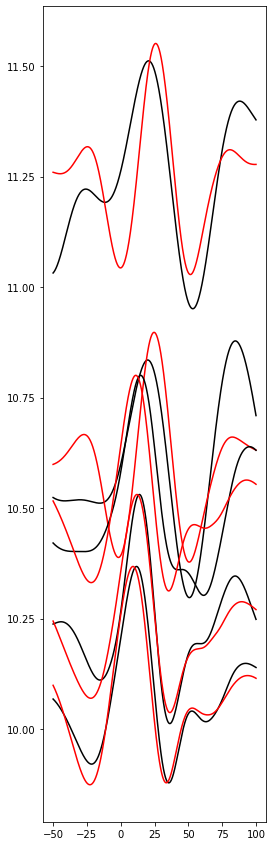

In [50]:
# /Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201804120756A.preprocessed_6s_to_100s.h5
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201804120756A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201804120756A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component)

225.99


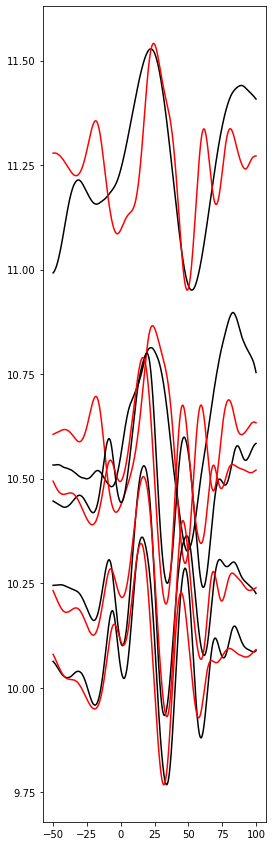

In [51]:
# /Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201804120756A.preprocessed_6s_to_100s.h5
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_simplify/raw_201804120756A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync/201804120756A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component)

## 201301221329A

/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/numpy/core/numerictypes.py:422: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  FutureWarning, stacklevel=2


248.28


/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/pyasdf/asdf_data_set.py:56: UserWarning: Attempting to normalize by dividing through zero. This is not allowed and the data will thus not be changed.
  closure_warn(self, *args, **kwargs)


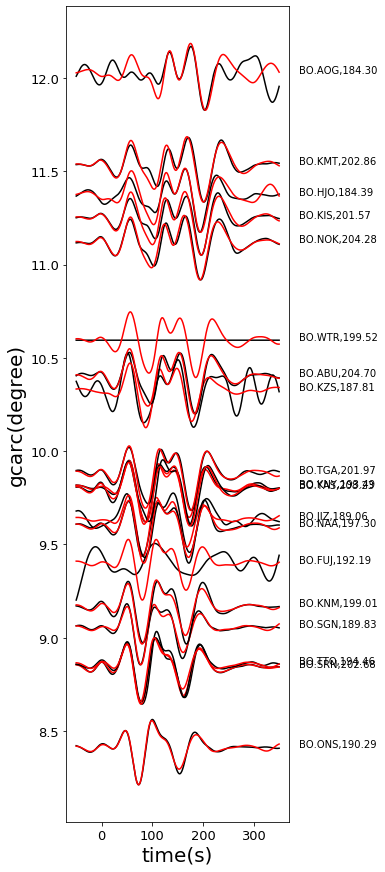

In [122]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,350,0.2)

248.28


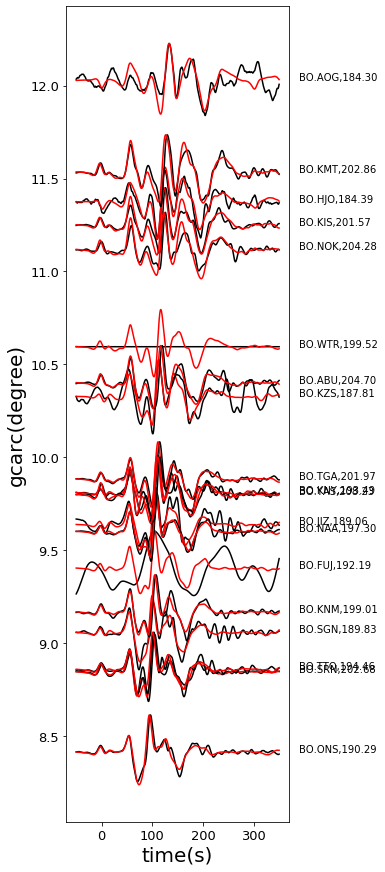

In [123]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,350,0.2)

248.28


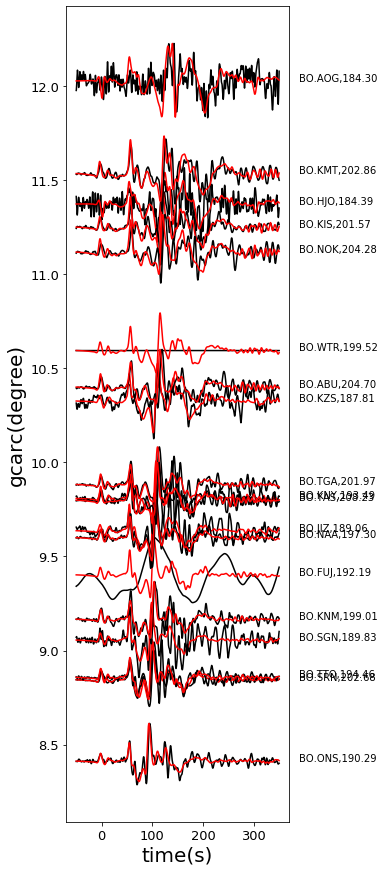

In [124]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,350,0.2)

248.28


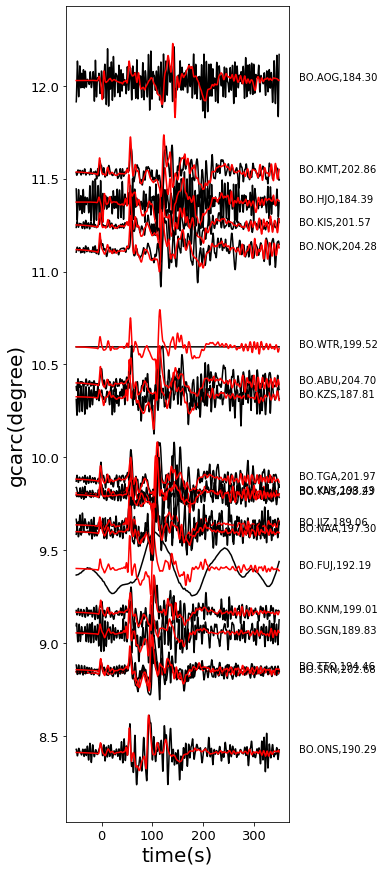

In [125]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="P"
component="Z"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,350,0.2)

/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/numpy/core/numerictypes.py:422: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  FutureWarning, stacklevel=2


248.28


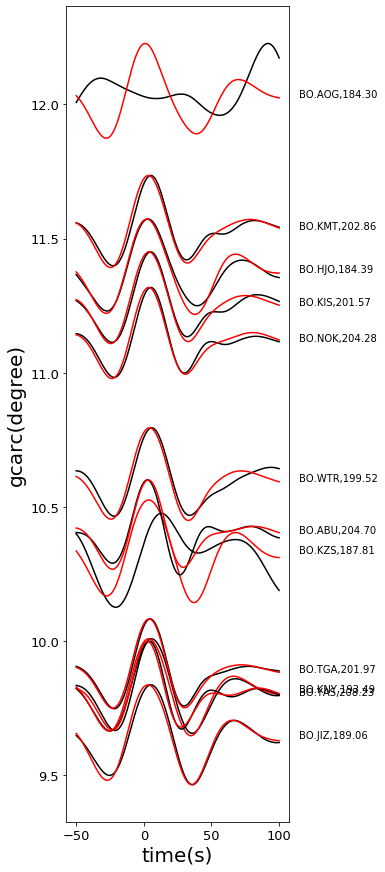

In [126]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_40s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_40s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

248.28


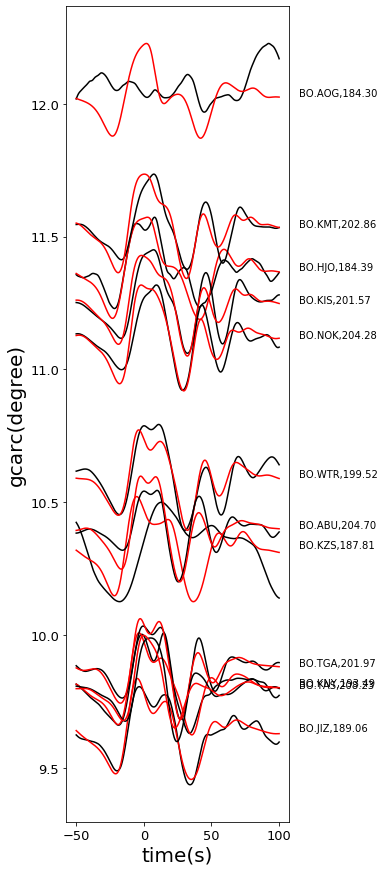

In [127]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_20s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_20s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.2)

248.28


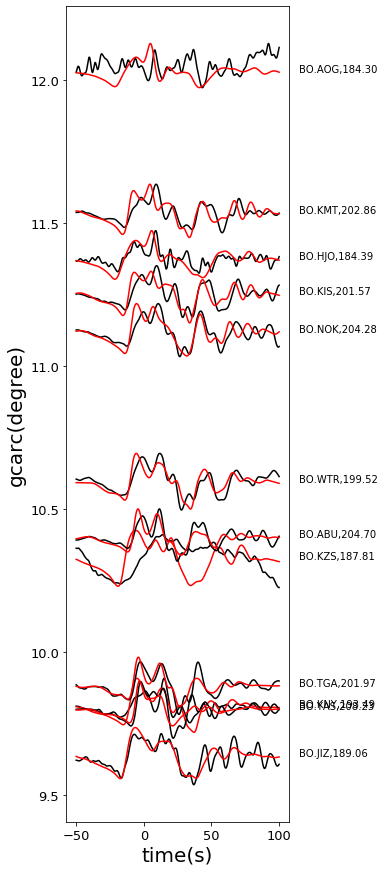

In [129]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_10s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_10s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.1)

248.28


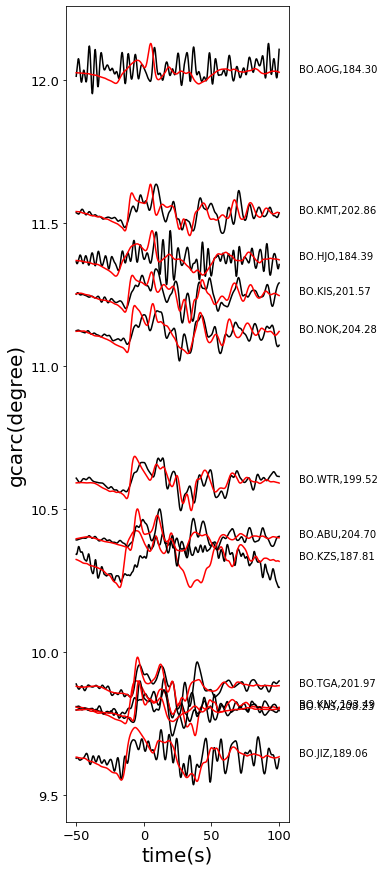

In [130]:
data_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/data_new/raw_201301221329A.preprocessed_6s_to_100s.h5"
sync_asdf_path="/Users/ziyixi/packages/seisflow/data/compare_three_depth/sync_new/201301221329A.preprocessed_6s_to_100s.h5"
stations=selected_stations
phase="S"
component="T"
plot_figure_abnormal(data_asdf_path,sync_asdf_path,stations,phase,component,-50,100,0.1)